In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [2]:
data = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')
data = data.iloc[:,1:] #selecting all rows but from index 1 column, index 0 column is Unnamed with no data
data.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [3]:
#get number of films
total_platforms = data[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].apply(pd.Series.value_counts).reset_index()
total_platforms.columns = ['Present', 'Netflix', 'Hulu', 'Prime Video', 'Disney+']
total_platforms

,Present,Netflix,Hulu,Prime Video,Disney+
0,0,13184,15841,4390,16180
1,1,3560,903,12354,564


In [4]:
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

<ipython-input-5-7f93e68be5ef>:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  p = plt.pie(total_platforms[total_platforms.Present == 1].iloc[:,1:], labels=labels, explode = (0.1, 0.1, 0.1, 0.1),


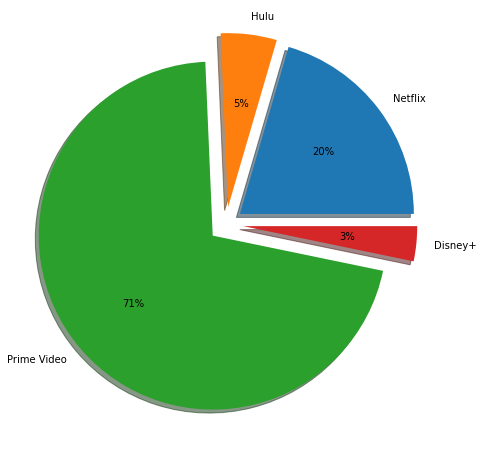

In [5]:
plt.figure(figsize=(12,8))
p = plt.pie(total_platforms[total_platforms.Present == 1].iloc[:,1:], labels=labels, explode = (0.1, 0.1, 0.1, 0.1), 
            autopct='%1.0f%%', labeldistance=1.1, shadow=True)

In [6]:
for i in labels:
    data['rating_'+i] = data['IMDb'] * data[i] #data[i] gives the 0 or 1 boolean


In [7]:
data.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,rating_Netflix,rating_Hulu,rating_Prime Video,rating_Disney+
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.8,0.0,0.0,0.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,8.7,0.0,0.0,0.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,8.5,0.0,0.0,0.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,8.5,0.0,0.0,0.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,8.8,0.0,8.8,0.0


In [8]:
imdb_platforms = data.replace(0, np.nan)
imdb_platforms = imdb_platforms[['rating_Netflix', 'rating_Hulu', 'rating_Prime Video', 'rating_Disney+']].mean().reset_index()
imdb_platforms.columns = ['ratings', 'mean']
imdb_platforms.sort_values(by='mean', ascending=False)

,ratings,mean
3,rating_Disney+,6.441385
0,rating_Netflix,6.252963
1,rating_Hulu,6.145006
2,rating_Prime Video,5.772365


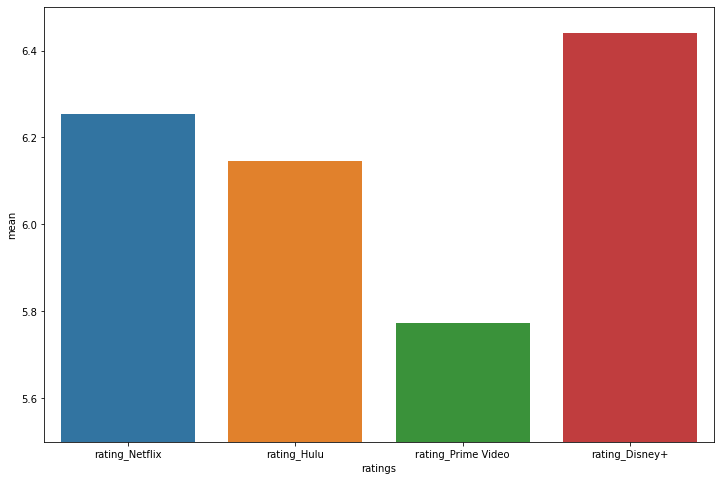

In [9]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="ratings", y="mean", data=imdb_platforms)
l = ax.set(ylim=(5.5, 6.5)) # Prime Video has more films but less quality types

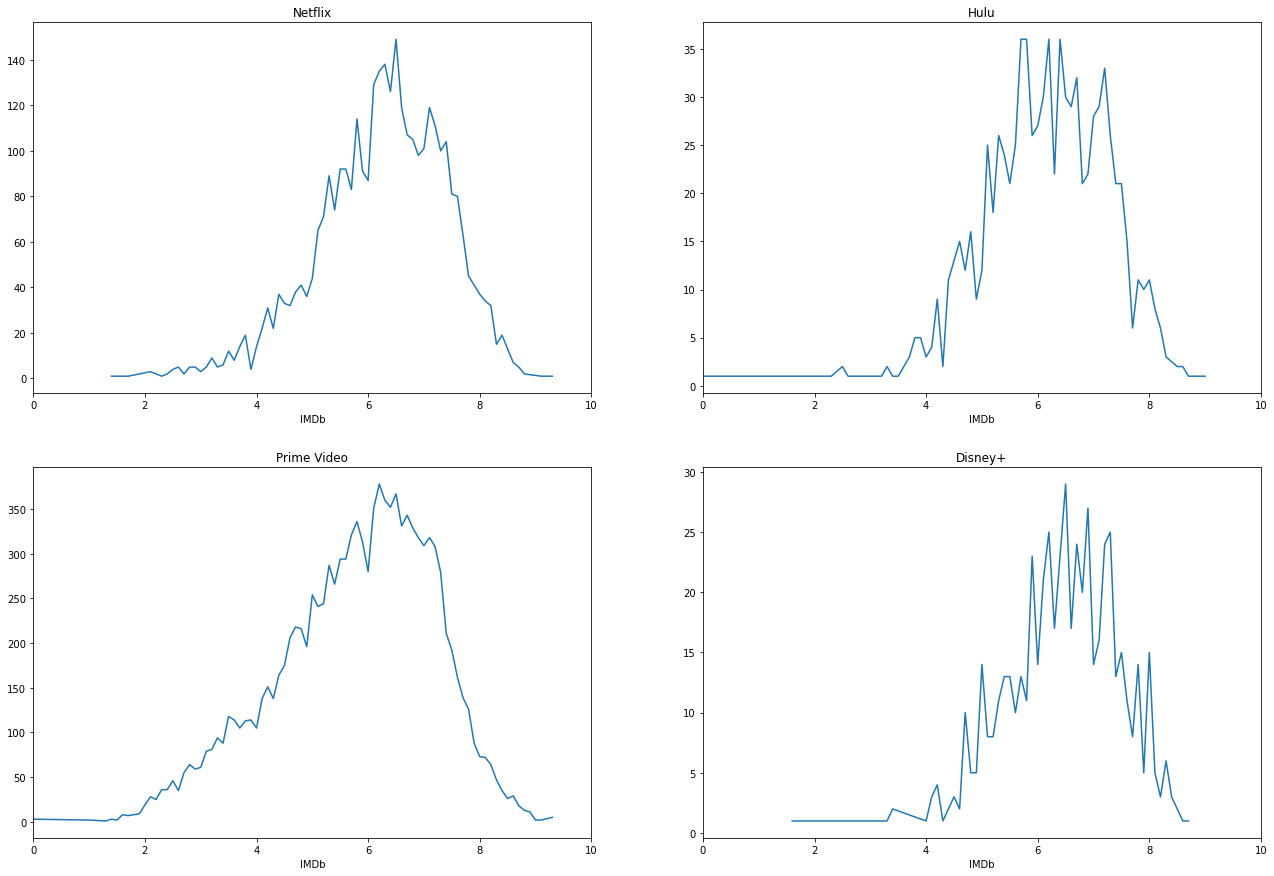

In [10]:
fig, axes = plt.subplots(2, 2,figsize=(22,15))

ax1 = data[data.Netflix == 1].groupby('IMDb')['ID'].count().plot(xlim=(0, 10), ax=axes[0,0])
ax2 = data[data.Hulu == 1].groupby('IMDb')['ID'].count().plot(xlim=(0, 10),ax=axes[0,1])
ax3 = data[data['Prime Video'] == 1].groupby('IMDb')['ID'].count().plot(xlim=(0, 10),ax=axes[1,0])
ax4 = data[data['Disney+'] == 1].groupby('IMDb')['ID'].count().plot(xlim=(0, 10),ax=axes[1,1])

ax1.title.set_text(labels[0])
ax2.title.set_text(labels[1])
ax3.title.set_text(labels[2])
ax4.title.set_text(labels[3])

plt.show() # Prime Video has a larger proportion of movies rated under 4


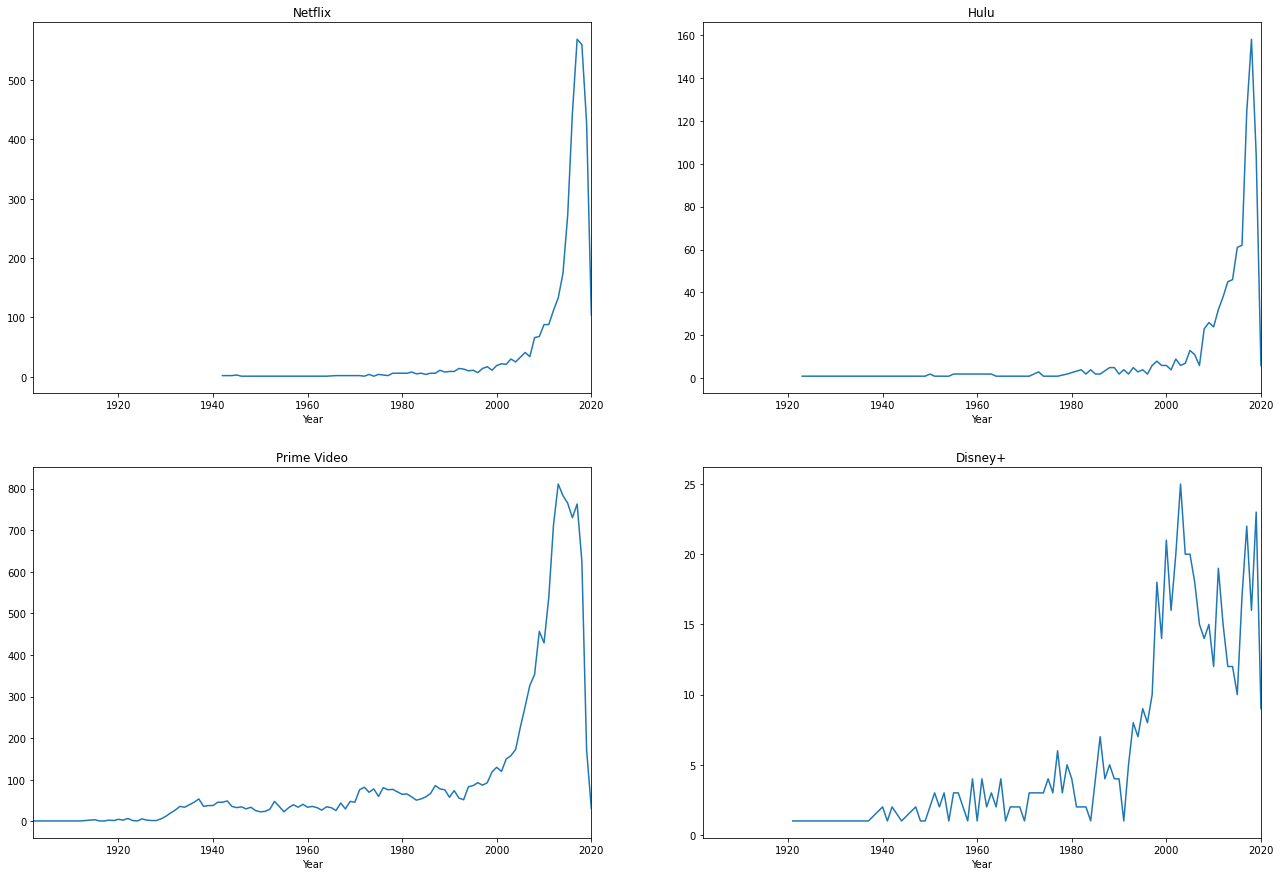

In [11]:
fig, axes = plt.subplots(2, 2,figsize=(22,15))

ax1 = data[data.Netflix == 1].groupby('Year')['ID'].count().plot(xlim=(data['Year'].min(), data['Year'].max()), ax=axes[0,0])
ax2 = data[data.Hulu == 1].groupby('Year')['ID'].count().plot(xlim=(data['Year'].min(), data['Year'].max()),ax=axes[0,1])
ax3 = data[data['Prime Video'] == 1].groupby('Year')['ID'].count().plot(xlim=(data['Year'].min(), data['Year'].max()),ax=axes[1,0])
ax4 = data[data['Disney+'] == 1].groupby('Year')['ID'].count().plot(xlim=(data['Year'].min(), data['Year'].max()),ax=axes[1,1])

ax1.title.set_text(labels[0])
ax2.title.set_text(labels[1])
ax3.title.set_text(labels[2])
ax4.title.set_text(labels[3])

plt.show()


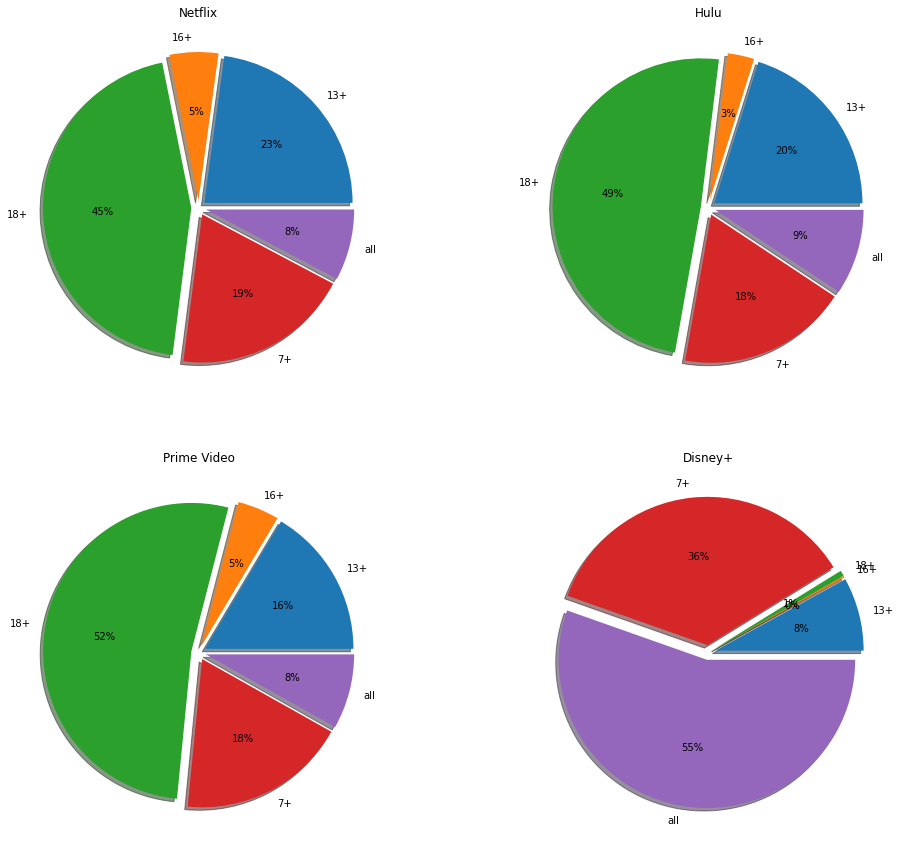

In [12]:
fig = plt.figure(figsize=(35,15))

age_netflix = data[data.Netflix == 1].groupby(['Age', 'Netflix']).count()['ID'].reset_index()[['Age', 'ID']]
age_hulu = data[data.Hulu == 1].groupby(['Age', 'Hulu']).count()['ID'].reset_index()[['Age', 'ID']]
age_prime = data[data['Prime Video'] == 1].groupby(['Age', 'Prime Video']).count()['ID'].reset_index()[['Age', 'ID']]
age_disney = data[data['Disney+'] == 1].groupby(['Age', 'Disney+']).count()['ID'].reset_index()[['Age', 'ID']]

ax = plt.subplot2grid((2,4),(0,0))
p = plt.pie(age_netflix['ID'], labels=age_netflix.Age, explode = (0.05, 0.05, 0.05, 0.05, 0.05), autopct='%1.0f%%', labeldistance=1.1, shadow=True)
plt.title('Netflix')
ax = plt.subplot2grid((2,4),(0,1))
p = plt.pie(age_hulu['ID'], labels=age_hulu.Age, explode = (0.05, 0.05, 0.05, 0.05, 0.05), autopct='%1.0f%%', labeldistance=1.1, shadow=True)
plt.title('Hulu')
ax = plt.subplot2grid((2,4),(1,0))
p = plt.pie(age_prime['ID'], labels=age_prime.Age, explode = (0.05, 0.05, 0.05, 0.05, 0.05), autopct='%1.0f%%', labeldistance=1.1, shadow=True)
plt.title('Prime Video')
ax = plt.subplot2grid((2,4),(1,1))
p = plt.pie(age_disney['ID'], labels=age_disney.Age, explode = (0.05, 0.05, 0.05, 0.05, 0.05), autopct='%1.0f%%', labeldistance=1.1, shadow=True)
plt.title('Disney+')
plt.show()  # Disney has a lot more accessible contents (91% of all or 7+)

In [13]:
#load data again
df = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
df = df.iloc[:, 1:]
#find missing values
miss = pd.DataFrame(df.isnull().sum())
miss = miss.rename(columns={0: "miss_count"})
miss["missing%"] = (miss.miss_count/len(df.ID))*100
miss

,miss_count,missing%
ID,0,0.000000
Title,0,0.000000
Year,0,0.000000
Age,9390,56.079790
IMDb,571,3.410177
Rotten Tomatoes,11586,69.194935
Netflix,0,0.000000
Hulu,0,0.000000
Prime Video,0,0.000000
Disney+,0,0.000000


In [14]:
#mssing %>50%
df.drop(['Rotten Tomatoes', 'Age'], axis =1, inplace=True)
# dropping NA from following columns
df.dropna(subset=[
    'IMDb', 'Directors', 'Genres', 'Country', 'Language', 'Runtime'
], inplace = True)

df.reset_index(inplace=True, drop=True)

#converting into object tyype

df.Year = df.Year.astype("object")
df.ID = df.ID.astype("object")

In [15]:
#select variable
numerical_df = df.select_dtypes(include=['float64', "int64"])

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn import preprocessing
from scipy.sparse import hstack
import pandas_profiling

In [17]:
#use preprocessing

#create minmax scaler
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

#create dataframe
numerical_df_max = pd.DataFrame((scaler.fit_transform(numerical_df)))

#assign column names
numerical_df_max.columns = numerical_df.columns

numerical_df_max.head()

,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
0,0.946237,1.0,0.0,0.0,0.0,0.0,0.449541
1,0.935484,1.0,0.0,0.0,0.0,0.0,0.412844
2,0.913978,1.0,0.0,0.0,0.0,0.0,0.452599
3,0.913978,1.0,0.0,0.0,0.0,0.0,0.351682
4,0.946237,1.0,0.0,1.0,0.0,0.0,0.489297


In [18]:
from sklearn.metrics.pairwise import cosine_similarity

#compute cosine similarity
sig = cosine_similarity(numerical_df_max, numerical_df_max)

#reverse maping of indices and titles
indices = pd.Series(df.index, index = df['Title']).drop_duplicates()
indices.head()

Title
Inception                         0
The Matrix                        1
Avengers: Infinity War            2
Back to the Future                3
The Good, the Bad and the Ugly    4
dtype: int64

In [19]:
def give_recomendation(title, sig = sig):
    """return the index of series of indices"""
    #get the index corresponding to original_title
    idx = indices[title]
    
    #get the pairwise similarity scores
    sig_scores = list(enumerate(sig[idx]))
    
    #sort the movies
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)
    
    #scores of 10 most similar movies
    movie_indices = [i[0] for i in sig_scores]
    #top 10 most similar movies
    return df['Title'].iloc[movie_indices]

In [20]:
#lets try
give_recomendation("The Matrix", sig= sig)

1                              The Matrix
1269               Eh Janam Tumhare Lekhe
747                     Khosla Ka Ghosla!
167                            Article 15
0                               Inception
                       ...               
13989                      Shark Exorcist
14281     Justin Bieber: Always Believing
12711         Justin Bieber: Rise to Fame
12827    In Memoriam Alexander Litvinenko
12828       From Philadelphia To Fallujah
Name: Title, Length: 15233, dtype: object

In [48]:
#the function performs all the important preprocessing steps
def preprocess(df):
    
    #combining all text columns
    # Selecting all object data type and storing them in list
    s = list(df.select_dtypes(include=['object']).columns)
    
    
    # Removing ID and Title column
    s.remove("Title")
    s.remove("ID")
    
    # Joining all text/object columns using commas into a single column
    df['all_text']= df[s].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

    # Creating a tokenizer to remove unwanted elements from our data like symbols and numbers
    token = RegexpTokenizer(r'[a-zA-Z]+')

    # Converting TfidfVector from the text
    cv = TfidfVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
    text_counts= cv.fit_transform(df['all_text'])

    # Selecting numerical variables
    ndf = df.select_dtypes(include=['float64',"int64"])

    # Scaling Numerical variables
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

    # Applying scaler on our data and converting i into a data frame
    ndfmx = pd.DataFrame((scaler.fit_transform(ndf)))
    ndfmx.columns=ndf.columns    

    # Adding our adding numerical variables in the TF-IDF vector
    IMDb = ndfmx.IMDb.values[:, None]
    X_train_dtm = hstack((text_counts, IMDb))
    
    Netflix = ndfmx.Netflix.values[:, None]
    X_train_dtm = hstack((X_train_dtm, Netflix))
    
    Hulu = ndfmx.Hulu.values[:, None]
    X_train_dtm = hstack((X_train_dtm, Hulu))
    
    Prime = ndfmx["Prime Video"].values[:, None]
    X_train_dtm = hstack((X_train_dtm, Prime))
    
    Disney = ndfmx["Disney+"].values[:, None]
    X_train_dtm = hstack((X_train_dtm, Disney))
    
    Runtime = ndfmx.Runtime.values[:, None]
    X_train_dtm = hstack((X_train_dtm, Runtime))
    
    return X_train_dtm
    

In [53]:
df['all_text'].tail()

15228    1980,Edward M. Abroms,Adventure,Drama,Family,U...
15229    1974,Bernard McEveety,Drama,Family,United Stat...
15230    2000,Dereck Joubert,Adventure,Family,United St...
15231    1980,Bruce Bilson,Comedy,Family,Fantasy,Horror...
15232    2001,Neal Israel,Comedy,Family,Sci-Fi,United S...
Name: all_text, dtype: object

In [33]:
# Preprocessing data
mat = preprocess(df)
mat.shape

(15233, 11997)

In [34]:
# using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

#compute the sigmoid kernel
sig2= cosine_similarity(mat, mat)

#reverse mapping of indices and movie titles
indices = pd.Series(df.index, index=df['Title']).drop_duplicates()

In [36]:
give_recomendation("The Matrix", sig = sig2)

1                              The Matrix
81                    The Matrix Reloaded
245                The Matrix Revolutions
755                     Jupiter Ascending
154                        Miss Americana
                       ...               
12931             Return of the Boogeyman
14281     Justin Bieber: Always Believing
12711         Justin Bieber: Rise to Fame
12827    In Memoriam Alexander Litvinenko
12828       From Philadelphia To Fallujah
Name: Title, Length: 15233, dtype: object